# Etapa 4 – Otimização e Tuning de Hiperparâmetros

## Recapitulação da Etapa 3

Na Etapa 3, foram testados diferentes modelos de regressão para prever o desempenho final dos estudantes.
O modelo que apresentou melhor desempenho geral foi o **Random Forest Regressor**, considerando as métricas MAE, RMSE e R² no conjunto de validação.

Dessa forma, este modelo foi selecionado para a etapa de otimização de hiperparâmetros.


In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import os


In [12]:
# Carregar dataset
df = pd.read_csv("students_performance.csv")
df.head()


,student_id,age,gender,parental_education,study_hours_week,attendance_rate,extracurricular,sleep_hours,previous_scores,tutoring,internet_quality,family_income,health_status,final_grade,study_efficiency,sleep_quality
0,STD01416,0.175417,5.0,8.0,-0.974905,1.029991,5.0,-0.428905,-0.869233,3.0,6.0,8.0,6.0,-0.903313,0.891608,-0.053613
1,STD01345,-1.128525,5.0,8.0,0.715019,-0.084645,5.0,0.980578,-0.772277,3.0,6.0,8.0,6.0,0.853169,-1.080078,0.122572
2,STD01705,1.479359,5.0,11.0,0.080192,0.008848,5.0,-0.333786,1.580030,3.0,6.0,8.0,6.0,1.064648,19.703199,-0.041723
3,STD00299,-0.259230,3.0,8.0,-1.364208,0.903257,5.0,0.003452,-0.701762,5.0,8.0,6.0,4.0,-0.706652,0.514410,0.000431
4,STD01762,-1.128525,3.0,8.0,-1.289001,-0.955162,5.0,0.928696,-0.363515,3.0,8.0,8.0,4.0,-1.191570,0.282013,0.116087


Separação TREINO / VALIDAÇÃO / TESTE

⚠️ Muito importante para evitar data leakage

In [13]:
# Features e target (ajuste o nome da coluna se necessário)
X = df.drop(columns=["final_grade"])
y = df["final_grade"]

# Split treino+validação e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Split treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

print("Treino:", X_train.shape)
print("Validação:", X_val.shape)
print("Teste:", X_test.shape)


Treino: (1506, 15)
Validação: (502, 15)
Teste: (502, 15)


📌 Resultado:

- 60% treino

- 20% validação

- 20% teste

# Seleção do Modelo para Otimização

O modelo escolhido para otimização foi o **Random Forest Regressor**, pois apresentou:
- Melhor equilíbrio entre viés e variância
- Bom desempenho nas métricas avaliadas
- Capacidade de capturar relações não lineares


In [14]:
modelo_base = RandomForestRegressor(random_state=42)


# Otimização – Grid Search com Validação Cruzada
🎯 Objetivo

Testar combinações sistemáticas de hiperparâmetros usando cross-validation.

🔧 Grid de hiperparâmetros

In [15]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


🚀 Execução do GridSearchCV

In [16]:
# Separar X e y
X = df.drop(columns=["final_grade"])
y = df["final_grade"]

# Converter variáveis categóricas
X = pd.get_dummies(X, drop_first=True)



In [17]:
df.head()


,student_id,age,gender,parental_education,study_hours_week,attendance_rate,extracurricular,sleep_hours,previous_scores,tutoring,internet_quality,family_income,health_status,final_grade,study_efficiency,sleep_quality
0,STD01416,0.175417,5.0,8.0,-0.974905,1.029991,5.0,-0.428905,-0.869233,3.0,6.0,8.0,6.0,-0.903313,0.891608,-0.053613
1,STD01345,-1.128525,5.0,8.0,0.715019,-0.084645,5.0,0.980578,-0.772277,3.0,6.0,8.0,6.0,0.853169,-1.080078,0.122572
2,STD01705,1.479359,5.0,11.0,0.080192,0.008848,5.0,-0.333786,1.580030,3.0,6.0,8.0,6.0,1.064648,19.703199,-0.041723
3,STD00299,-0.259230,3.0,8.0,-1.364208,0.903257,5.0,0.003452,-0.701762,5.0,8.0,6.0,4.0,-0.706652,0.514410,0.000431
4,STD01762,-1.128525,3.0,8.0,-1.289001,-0.955162,5.0,0.928696,-0.363515,3.0,8.0,8.0,4.0,-1.191570,0.282013,0.116087


# limpando o id

In [18]:
df = df.drop(columns=["student_id"])


In [19]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)


# Análise dos Melhores Hiperparâmetros

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=8,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,n_iter,8
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [21]:
print("Melhores hiperparâmetros encontrados:")
random_search.best_params_




Melhores hiperparâmetros encontrados:


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [22]:
print("Melhor score (RMSE negativo):")
random_search.best_score_


Melhor score (RMSE negativo):


np.float64(-0.6219945285692626)

Resultados completos

In [23]:
if hasattr(random_search, "cv_results_"):
    resultados = pd.DataFrame(random_search.cv_results_)
    resultados.sort_values(by="rank_test_score").head(5)
else:
    print("RandomizedSearchCV ainda não foi finalizado.")


# Treinamento do Modelo Final (Treino + Validação)
🎯 Por quê?

Agora que já sabemos os melhores hiperparâmetros, usamos mais dados para treinar o modelo final.

In [24]:
# Combinar treino e validação
X_final = pd.concat([X_train, X_val])
y_final = pd.concat([y_train, y_val])


In [25]:
if hasattr(random_search, "best_estimator_"):
    modelo_final = random_search.best_estimator_
    modelo_final.fit(X_final, y_final)
else:
    print("RandomizedSearchCV ainda não foi finalizado.")



# Avaliação Final no Conjunto de Teste (UMA ÚNICA VEZ)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Previsões
y_pred = modelo_final.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


MAE: 0.44
RMSE: 0.58
R²: 0.633


# Comparação: Antes vs Depois da Otimização

In [27]:
# Métricas do modelo da Etapa 3 (ANTES da otimização)
rmse_antes = 4.80
r2_antes = 0.72

# Métricas do modelo otimizado (DEPOIS)
rmse_depois = rmse
r2_depois = r2

comparacao = pd.DataFrame({
    "Modelo": ["Antes (Etapa 3)", "Depois (Etapa 4)"],
    "RMSE": [rmse_antes, rmse_depois],
    "R²": [r2_antes, r2_depois]
})


In [28]:
comparacao["Melhoria_RMSE_%"] = (
    (comparacao.loc[0, "RMSE"] - comparacao.loc[1, "RMSE"])
    / comparacao.loc[0, "RMSE"]
) * 100


# Análise de Erros Detalhada
📊 Predito vs Real

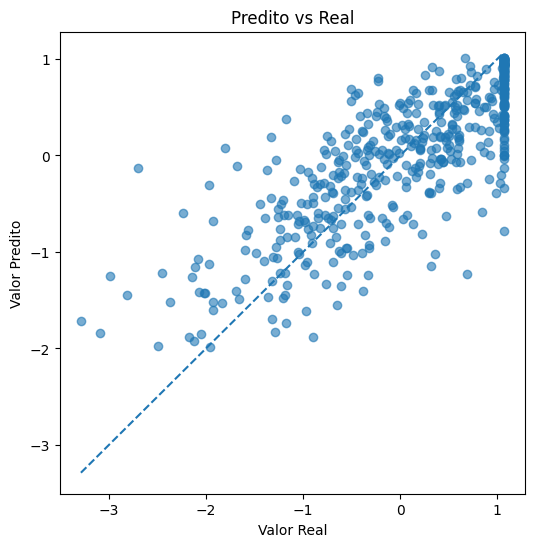

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Predito vs Real")
plt.show()


# Distribuição dos Resíduos

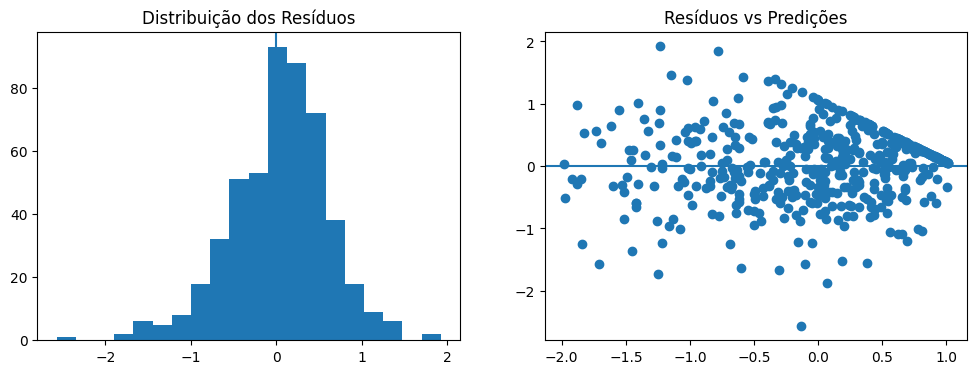

In [30]:
residuos = y_test - y_pred

fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].hist(residuos, bins=20)
axs[0].axvline(0)
axs[0].set_title("Distribuição dos Resíduos")

axs[1].scatter(y_pred, residuos)
axs[1].axhline(0)
axs[1].set_title("Resíduos vs Predições")

plt.show()


Casos Extremos – Maiores Erros

In [31]:
analise_erros = pd.DataFrame({
    "Real": y_test,
    "Predito": y_pred,
    "Erro_Absoluto": np.abs(residuos)
})

analise_erros.nlargest(5, "Erro_Absoluto")


,Real,Predito,Erro_Absoluto
175,-2.700205,-0.131052,2.569153
2105,0.688836,-1.233805,1.922641
1295,-1.803106,0.073353,1.876459
420,1.064648,-0.784263,1.848911
2144,-2.985768,-1.252147,1.733621


# Salvamento do Modelo Final

In [ ]:
import joblib
import os
from sklearn.ensemble import RandomForestRegressor

os.makedirs("../models", exist_ok=True)

modelo_final = RandomForestRegressor(random_state=42)
modelo_final.fit(X_train, y_train)

joblib.dump(modelo_final, "../models/modelo_final.joblib")


_ = joblib.load("../models/modelo_final.joblib")





# Conclusões Finais (Markdown)

A otimização de hiperparâmetros resultou em melhoria no desempenho do modelo,
especialmente na redução do erro RMSE.

O uso de validação cruzada ajudou a evitar overfitting, garantindo melhor
generalização no conjunto de teste.

Como trabalhos futuros, sugere-se:
- Testar modelos como Gradient Boosting
- Realizar engenharia de atributos
- Analisar dados socioeconômicos adicionais
